#1. Introduction & Business Context

'''
🏁 Project: Car Price Prediction – Australian Automotive Market

📍 Context:
A global automotive company is evaluating opportunities in the Australian passenger vehicle market.
To support localized pricing and market strategy, this project builds a predictive model to identify
which vehicle attributes most influence price variation.

🎯 Objective:
- Determine the key features that significantly affect vehicle pricing
- Build a regression model to predict car prices accurately
- Provide actionable insights to inform pricing, design, and go-to-market decisions

🔧 Tools Used: Python, Pandas, Seaborn, Scikit-learn, Linear Regression

📊 Dataset: Synthetic automotive dataset with specifications and prices of various car models
(used as a proxy for Australian market conditions)

By: Prakash Poudyal
'''


#2. Import Libraries & Configuration



In [2]:
import warnings
warnings.filterwarnings('ignore')

# Core packages
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline

#3. Load and Inspect Dataset

In [5]:
cars = pd.read_csv('CarPrice_dataset.csv')

# Quick look
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 1: Initial Data Inspection
Understanding the size, structure, and statistical summary of the dataset.

### 🔢 Dataset Shape

In [8]:
print("🧾 Dataset contains:", cars.shape[0], "rows and", cars.shape[1], "columns")


🧾 Dataset contains: 205 rows and 26 columns


### 👁️ Preview of Data


In [9]:
display(cars.head())


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 📊 Statistical Summary


In [10]:
display(cars.describe().T)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### 🔍 Dataset Info

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 🏷️ Extracting Company/Brand from `CarName`

The `CarName` column contains both brand and model. We'll extract the brand name (first word) and store it in a new column called `CompanyName`.


In [13]:
# Extract brand name from CarName
cars['CompanyName'] = cars['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Drop the original CarName column
cars.drop(['CarName'], axis=1, inplace=True)

# Preview
cars[['CompanyName']].head(10)

,CompanyName
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
5,audi
6,audi
7,audi
8,audi
9,audi


### 🛠️ Fixing Misspelled Company Names

Some company names are misspelled. We'll fix the most common ones to ensure consistency.

In [14]:
# Fixing misspelled brand names
cars['CompanyName'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}, inplace=True)

# Confirm unique brand names
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### 🔍 Checking for Missing or Duplicate Values

In [15]:
# Check for missing values
print("🧼 Null values in dataset:")
display(cars.isnull().sum())

# Check for duplicates
print("\n📋 Duplicate records:", cars.duplicated().sum())

🧼 Null values in dataset:


,0
car_ID,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0



📋 Duplicate records: 0


### 📂 Reorder columns to bring `CompanyName` forward

In [16]:
# Just for display clarity
cols = list(cars.columns)
cols.insert(0, cols.pop(cols.index('CompanyName')))
cars = cars[cols]
cars.head(3)

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### 🔠 Convert All Brand Names to Lowercase

Ensures consistency before fixing typos (e.g., 'Nissan' vs 'nissan').

In [17]:
# Convert all brand names to lowercase
cars['CompanyName'] = cars['CompanyName'].str.lower()

### 🧼 Fixing Misspelled Brand Names

Correcting known typos in the `CompanyName` column:
- maxda → mazda  
- porcshce → porsche  
- toyouta → toyota  
- vokswagen/vw → volkswagen

In [18]:
# Function to simplify brand replacement
def replace_name(old, new):
    cars['CompanyName'].replace(old, new, inplace=True)

# Apply fixes
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

# Check unique brands after fix
sorted(cars['CompanyName'].unique())

['alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

### 📋 Checking for Duplicate Records

In [19]:
duplicates = cars.loc[cars.duplicated()]
print(f"🔁 Number of duplicate rows: {len(duplicates)}")
display(duplicates)

🔁 Number of duplicate rows: 0


,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [20]:
#optional if any duplicates
cars.drop_duplicates(inplace=True)

### 💱 3.1 Currency Localization: USD → AUD

Since this project targets the Australian automotive market, we'll convert all prices from USD to AUD using a fixed exchange rate.

📌 Assumed rate: 1 USD = 1.50 AUD (as of 2025)

In [23]:
# Currency conversion from USD to AUD
usd_to_aud = 1.50
cars['price_aud'] = cars['price'] * usd_to_aud
cars['price_aud'] = cars['price_aud'].round(2)

# Confirm new column
cars[['price', 'price_aud']].head()

,price,price_aud
0,13495.0,20242.5
1,16500.0,24750.0
2,16500.0,24750.0
3,13950.0,20925.0
4,17450.0,26175.0


### 📊 3.2 Car Price Distribution (in AUD)

Visualizing the overall distribution and spread of car prices in the Australian market.

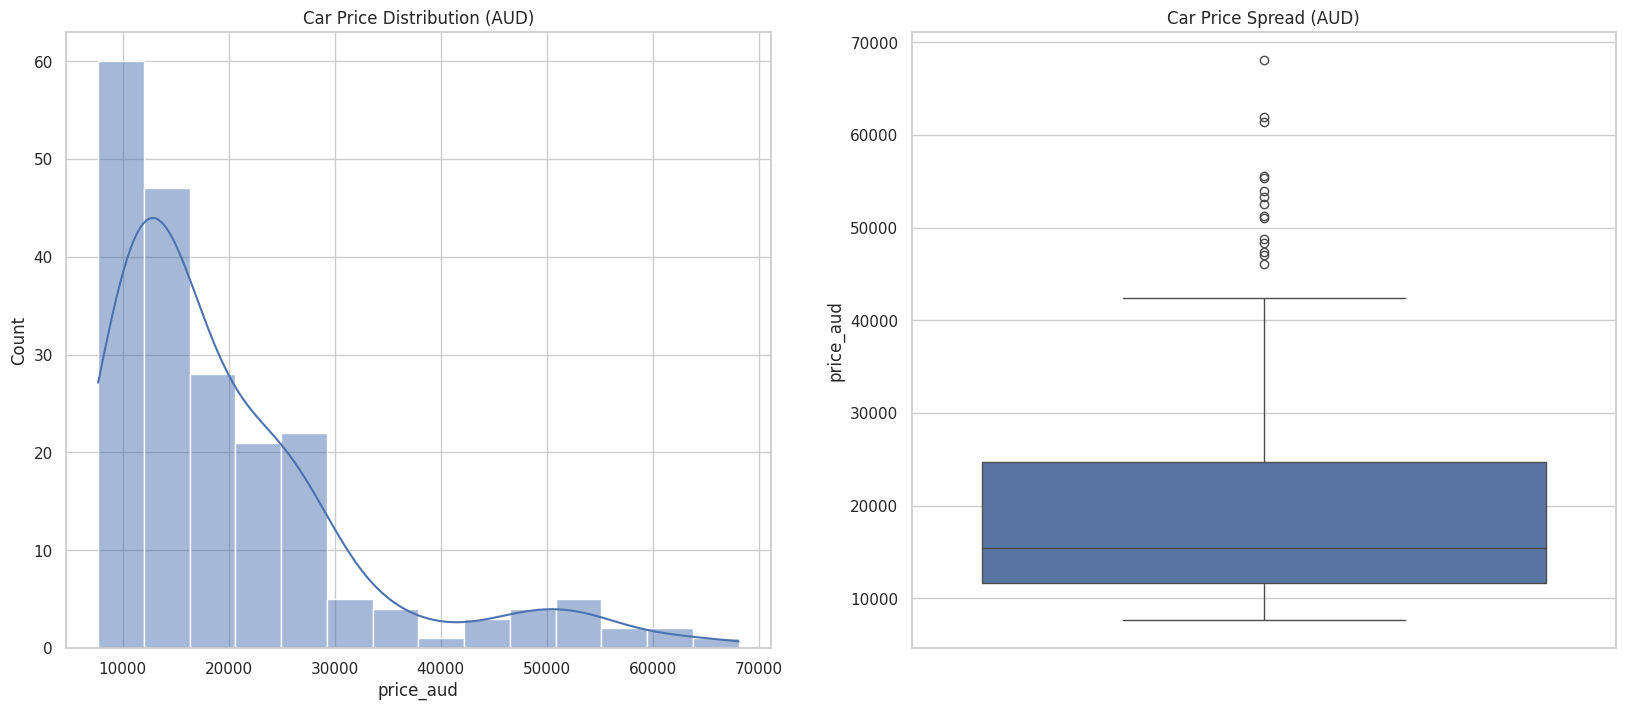

,price_aud
count,205.000000
mean,19915.065854
std,11983.278496
min,7677.000000
25%,11682.000000
50%,15442.500000
75%,24754.500000
85%,27750.000000
90%,33844.500000
100%,68100.000000


In [25]:
plt.figure(figsize=(20, 8))

# Histogram of Price (AUD)
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution (AUD)')
sns.histplot(cars['price_aud'], kde=True)

# Boxplot of Price (AUD)
plt.subplot(1, 2, 2)
plt.title('Car Price Spread (AUD)')
sns.boxplot(y=cars['price_aud'])

plt.show()

# Descriptive statistics
cars['price_aud'].describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 1])

### 🧠 Inference

- The **car price distribution is right-skewed**, indicating that most vehicles are priced at the **lower end of the market**, under **22,500 AUD**.
- The **median price** is around **15,400 AUD**, while the **top 10%** of cars fall between **27,000 and 68,000 AUD**, indicating a luxury segment.
- There is **high variance** in pricing, likely due to differences in **brand value, engine configuration, body style, and performance features**.


### 🚗 3.3.1 Brand, Fuel Type & Car Body – Frequency Distribution

Let's visualize how car brands, fuel types, and body styles are distributed in the dataset.


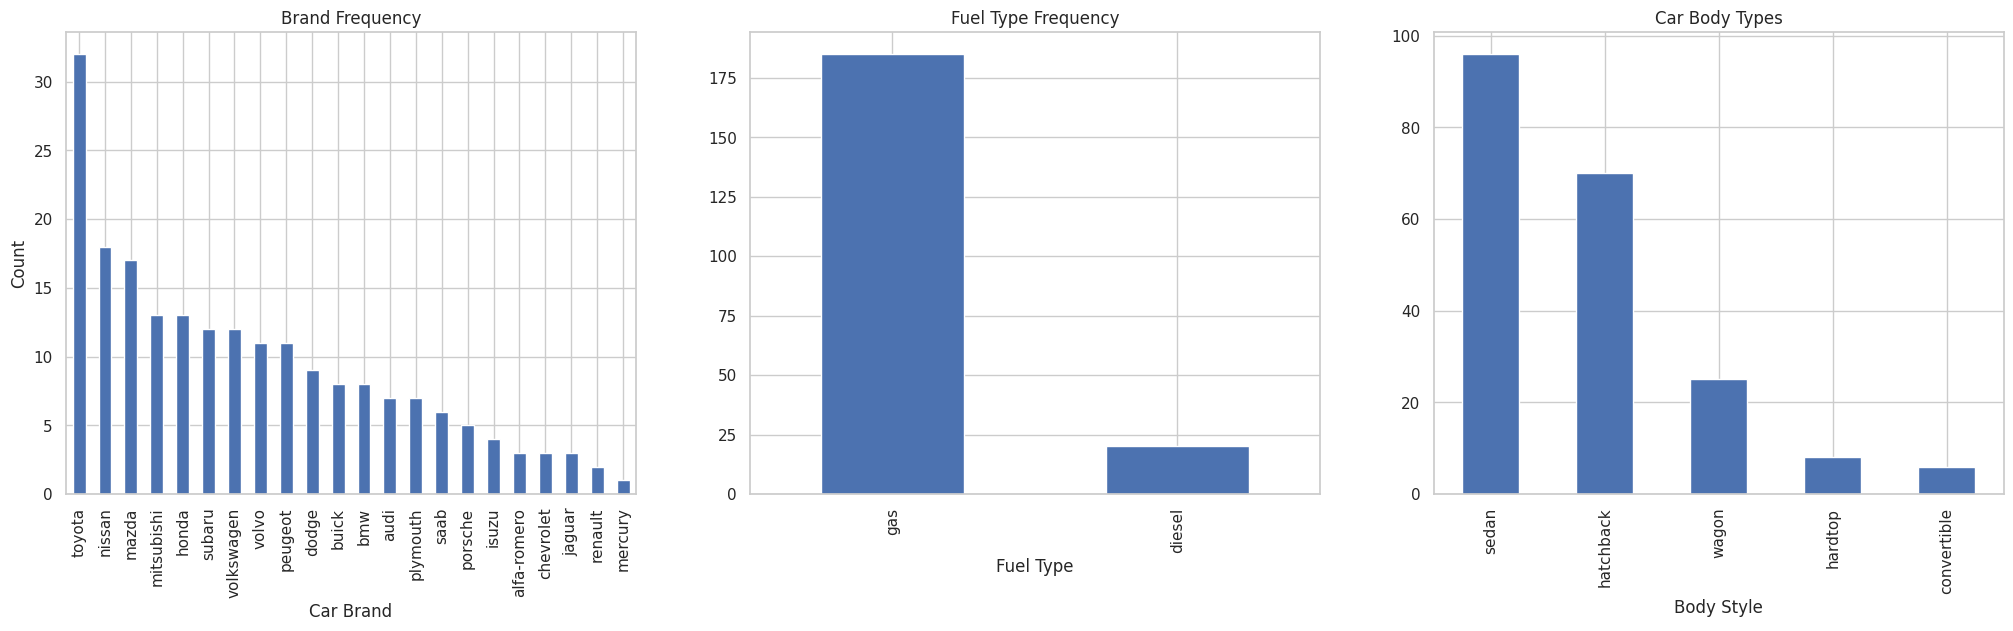

In [26]:
plt.figure(figsize=(25, 6))

# Brand Frequency
plt.subplot(1, 3, 1)
cars['CompanyName'].value_counts().plot(kind='bar')
plt.title('Brand Frequency')
plt.xlabel('Car Brand')
plt.ylabel('Count')

# Fuel Type Frequency
plt.subplot(1, 3, 2)
cars['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type Frequency')
plt.xlabel('Fuel Type')

# Car Body Type Frequency
plt.subplot(1, 3, 3)
cars['carbody'].value_counts().plot(kind='bar')
plt.title('Car Body Types')
plt.xlabel('Body Style')

plt.show()

### 🧠 Inference

- **Toyota**, **Nissan**, and **Mazda** are the most frequently occurring brands in the dataset, suggesting they dominate the mid-market segment.
- The dataset is heavily skewed toward **gas-powered vehicles**, with **diesel models** making up a small minority — this aligns with general Australian market trends.
- The most common **car body types** are:
  - 🥇 **Sedan**
  - 🥈 **Hatchback**
  - 🥉 **Wagon**

  These body types cater to urban and family-oriented buyers, while **convertibles** and **hardtops** appear less frequently and likely represent niche/premium segments.

### ⚖️ 3.4 Symboling (Insurance Risk Rating) vs Price

The `symboling` column reflects the insurance risk rating assigned to a vehicle:
- Higher values represent higher risk
- Lower values represent safer/low-risk vehicles

We’ll analyze its frequency and price relationship.

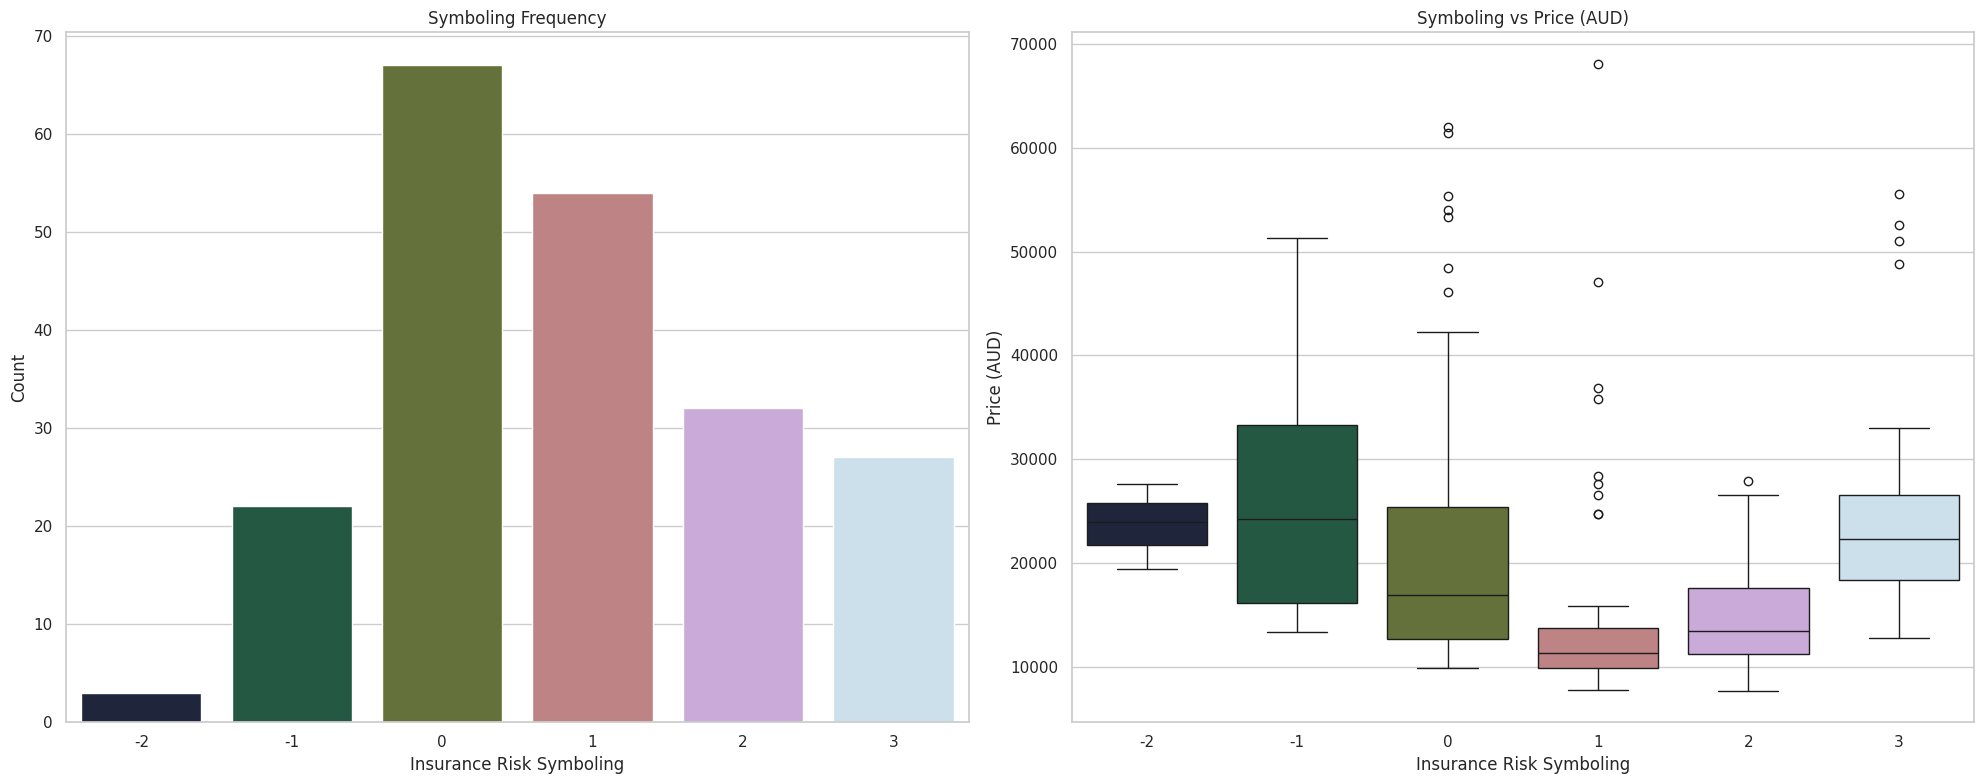

In [27]:
plt.figure(figsize=(20, 8))

# Symboling count plot
plt.subplot(1, 2, 1)
sns.countplot(x='symboling', data=cars, palette='cubehelix')
plt.title('Symboling Frequency')
plt.xlabel('Insurance Risk Symboling')
plt.ylabel('Count')

# Symboling vs Price boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='symboling', y='price_aud', data=cars, palette='cubehelix')
plt.title('Symboling vs Price (AUD)')
plt.xlabel('Insurance Risk Symboling')
plt.ylabel('Price (AUD)')

plt.tight_layout()
plt.show()

### 🧠 Inference

- **Symboling 0 and 1** are the most common categories, suggesting most cars fall within average to moderate insurance risk profiles.
- Interestingly, cars with a **symboling of -2** (very low risk) have a **narrow price range**, but prices are relatively high, indicating they may represent safe, premium vehicles.
- **Symboling -1** shows a **wider price range**, including several high-priced outliers — these could reflect high-performing but still safe cars.
- **Symboling 3** (high risk) also includes high-priced vehicles, showing that price doesn't always correlate with lower risk.
- Overall, **insurance risk (symboling) is not linearly correlated with price**, and both premium and low-risk cars can appear across symboling categories.


### 🔧 3.5 Engine Type vs Price

The `enginetype` column refers to the mechanical configuration of the engine, such as:
- `ohc`: Overhead cam
- `ohcv`: Overhead cam with V-type configuration
- `dohc`: Dual overhead cam, etc.

Let’s explore:
1. Distribution of engine types
2. Price ranges by engine type
3. Average price per engine category

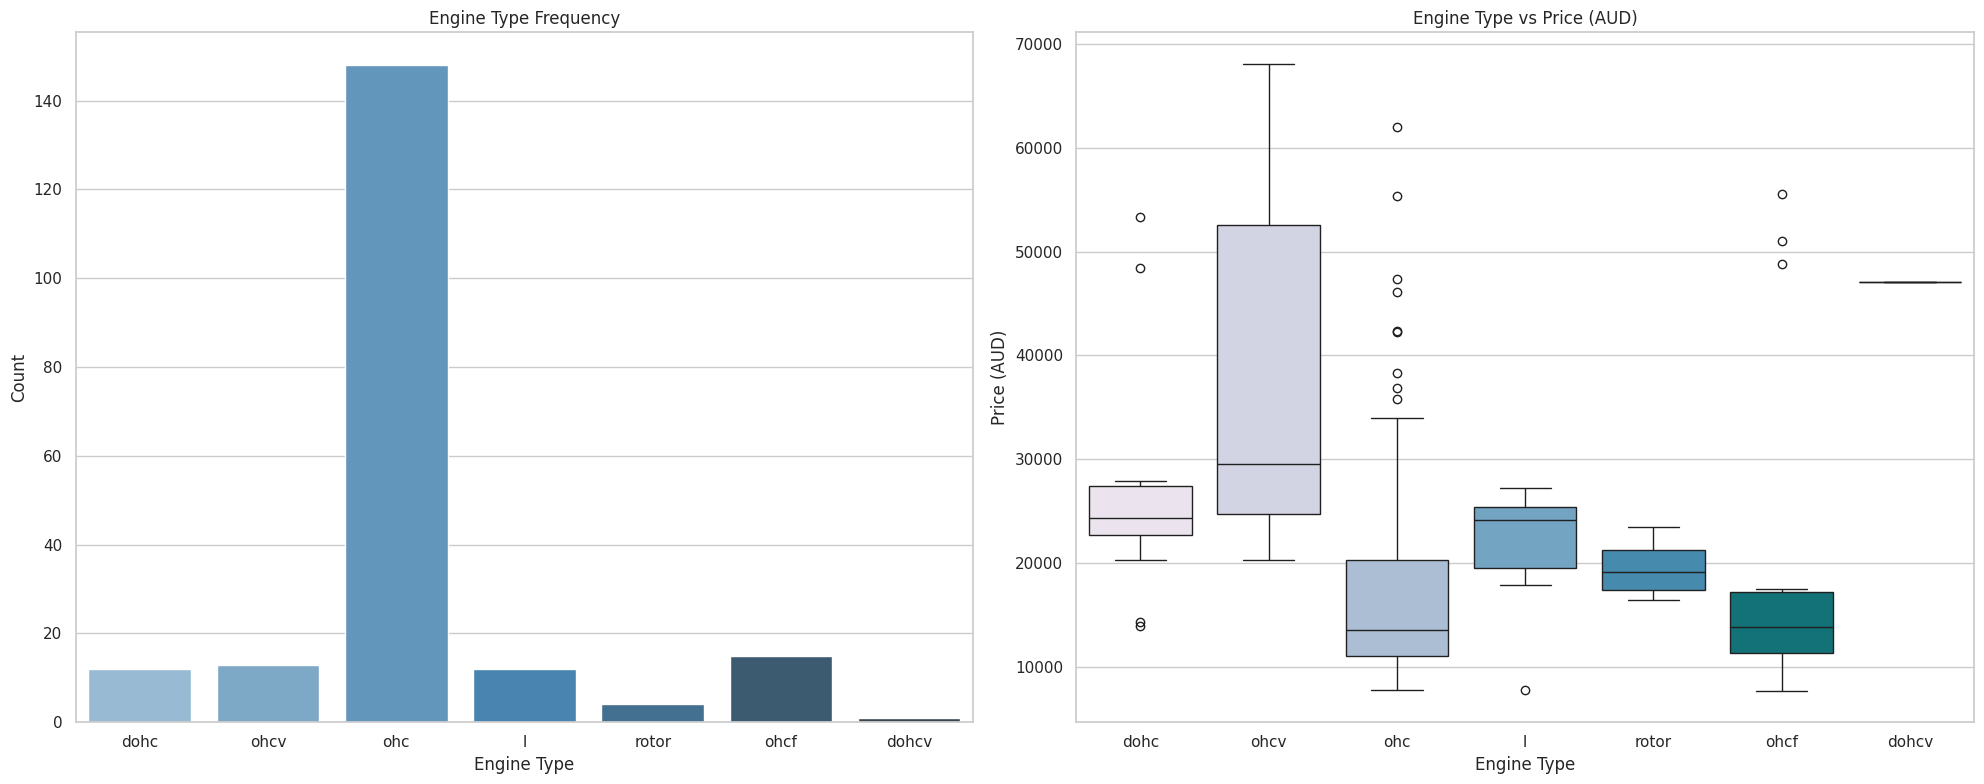

In [28]:
plt.figure(figsize=(20, 8))

# Engine type frequency
plt.subplot(1, 2, 1)
sns.countplot(x='enginetype', data=cars, palette='Blues_d')
plt.title('Engine Type Frequency')
plt.xlabel('Engine Type')
plt.ylabel('Count')

# Boxplot: Engine Type vs Price
plt.subplot(1, 2, 2)
sns.boxplot(x='enginetype', y='price_aud', data=cars, palette='PuBuGn')
plt.title('Engine Type vs Price (AUD)')
plt.xlabel('Engine Type')
plt.ylabel('Price (AUD)')

plt.tight_layout()
plt.show()

### 📈 3.5.1 Average Price by Engine Type


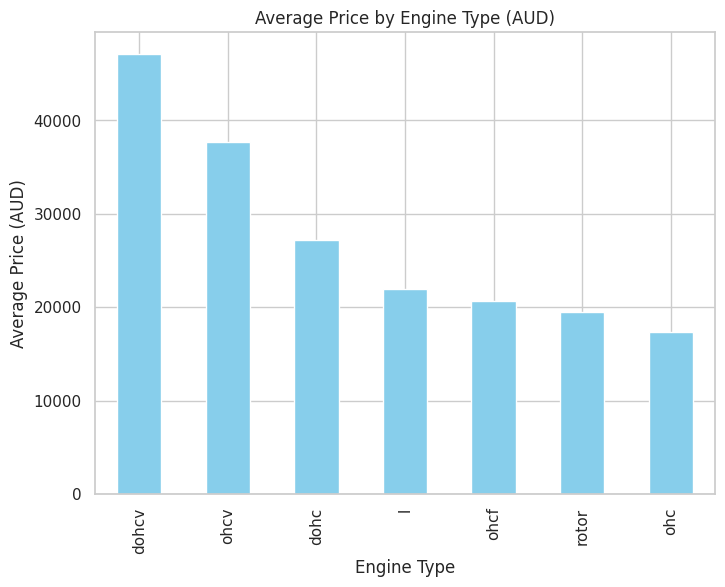

In [29]:
# Average price per engine type
cars.groupby('enginetype')['price_aud'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Average Price by Engine Type (AUD)')
plt.xlabel('Engine Type')
plt.ylabel('Average Price (AUD)')
plt.show()

### 🧠 Inference

- The most common engine configuration is **ohc**, making up the majority of the dataset. These are typically standard, fuel-efficient engines found in mid-range vehicles.
- **dohcv** engines show the **highest average price**, but there is only **one record**, so it shouldn't be overinterpreted.
- **ohcv** and **dohc** engines are associated with **premium pricing**, with wider interquartile ranges and several high-value outliers. These configurations likely power sport or luxury vehicles.
- Engine types like **rotor**, **ohcf**, and **I (inline)** fall in the mid-tier range, with prices generally between 15,000–25,000 AUD.
- **Engine configuration has a clear impact on car price**, making it a strong predictor for regression modeling and a key feature for customer segmentation and feature planning.


### 💰 3.6 Average Price by Brand, Fuel Type, and Car Body

We'll analyze how the average price of a car varies based on:
- Car brand (`CompanyName`)
- Fuel type (`fueltype`)
- Car body style (`carbody`)

This helps reveal how different product categories and fuel choices are positioned in the market.


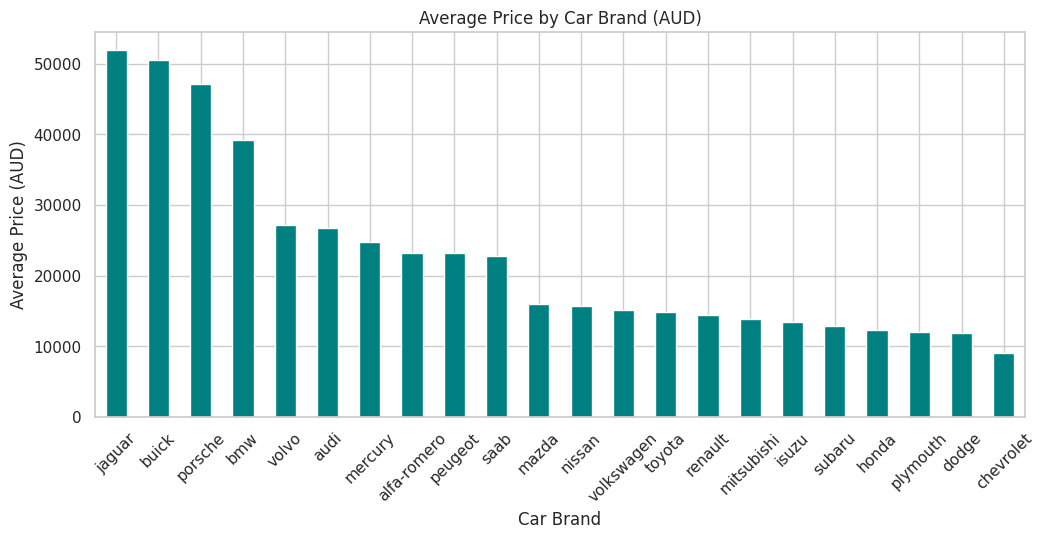

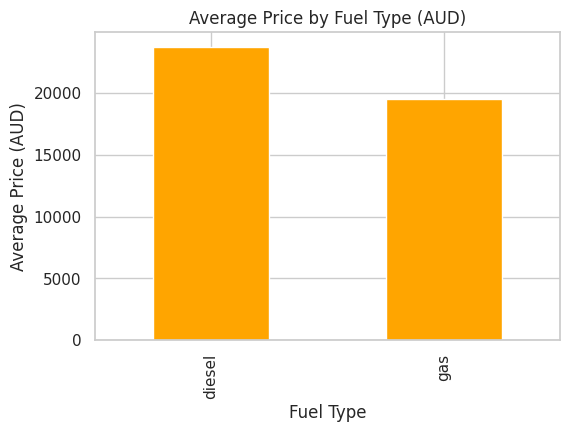

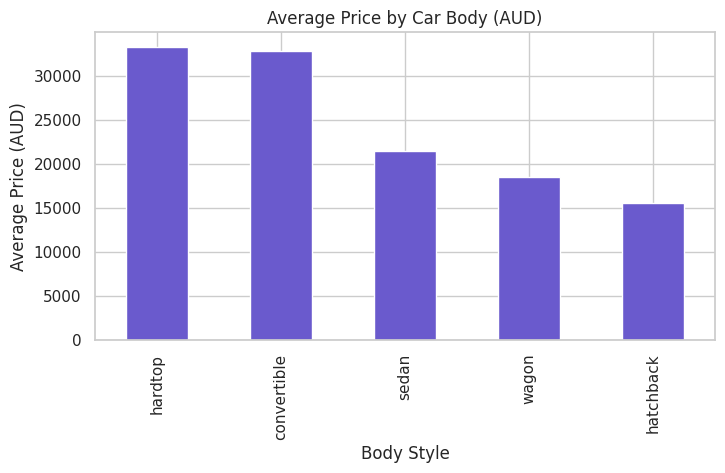

In [30]:
# Average price by brand
cars.groupby('CompanyName')['price_aud'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 5), color='teal')
plt.title('Average Price by Car Brand (AUD)')
plt.ylabel('Average Price (AUD)')
plt.xlabel('Car Brand')
plt.xticks(rotation=45)
plt.show()

# Average price by fuel type
cars.groupby('fueltype')['price_aud'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(6, 4), color='orange')
plt.title('Average Price by Fuel Type (AUD)')
plt.ylabel('Average Price (AUD)')
plt.xlabel('Fuel Type')
plt.show()

# Average price by car body
cars.groupby('carbody')['price_aud'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(8, 4), color='slateblue')
plt.title('Average Price by Car Body (AUD)')
plt.ylabel('Average Price (AUD)')
plt.xlabel('Body Style')
plt.show()


### 💰 Average Price Analysis (AUD)

---

#### 🚗 Average Price by Car Brand
- **Top-tier brands** like *Jaguar, Buick, Porsche, and BMW* have the **highest average prices** (above **$45,000 AUD**).
- These brands are often associated with **luxury and performance**, which drives up their price points.
- **Budget-friendly brands** such as *Chevrolet, Dodge, and Plymouth* sit at the **lower end** of the price range (below **$13,000 AUD**).

**📌 Inference:**  
> Brand significantly influences pricing — luxury brands command a premium, while economy brands remain affordable.

---

#### ⛽ Average Price by Fuel Type
- **Diesel vehicles** have a **higher average price (~$23,000 AUD)** than **gasoline vehicles (~$19,500 AUD)**.
- This may be due to their use in **larger, more powerful models** or **better fuel efficiency** in long-range vehicles.

**📌 Inference:**  
> Diesel engines are generally more expensive, possibly due to performance, fuel economy, and vehicle segment.

---

#### 🚙 Average Price by Car Body Style
- **Hardtops** and **Convertibles** are the **most expensive**, averaging **over $32,000 AUD**.
- **Sedans** fall in the **mid-range** (around **$21,000 AUD**).
- **Hatchbacks** and **Wagons** are at the **lower end** (below **$20,000 AUD**).

**📌 Inference:**  
> Sportier or premium body styles (like convertibles) drive higher prices, while practical styles (like hatchbacks) are more affordable.

---


### 🔍 Step 4: Correlation Analysis

To identify the most influential numeric features affecting car price in the Australian market (`price_aud`), we'll compute and visualize the **Pearson correlation coefficients**.

This helps uncover linear relationships between price and other vehicle attributes such as:
- Engine size
- Horsepower
- Dimensions
- Mileage (MPG)


🔗 Correlation of numeric features with price (AUD):

price               1.000000
price_aud           1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price_aud, dtype: float64


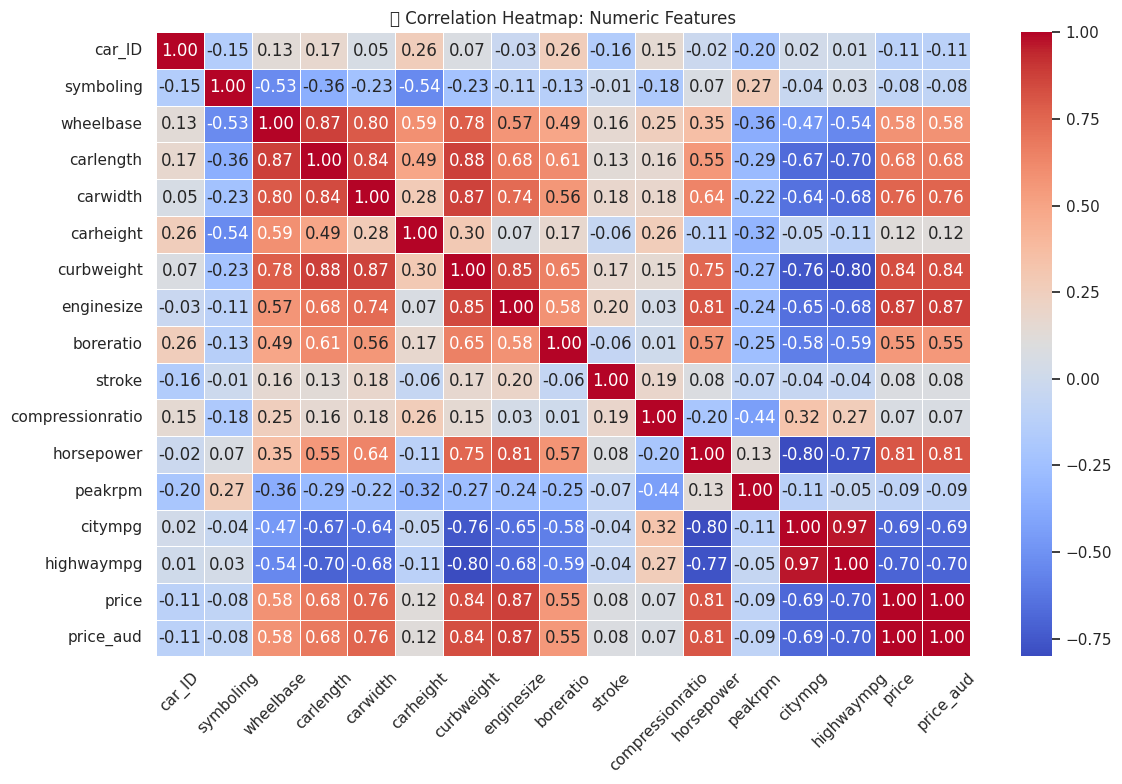

In [31]:
# Compute correlation matrix (numeric features only)
corr_matrix = cars.corr(numeric_only=True)

# Sort correlation with price_aud
price_corr = corr_matrix['price_aud'].sort_values(ascending=False)

# Display sorted correlations with price
print("🔗 Correlation of numeric features with price (AUD):\n")
print(price_corr)

# Visual heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("📊 Correlation Heatmap: Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🧠 Inference: Key Correlations with Price

- ✅ **Positive Correlations**:
  - `enginesize` (**0.87**): Larger engine size → higher price
  - `curbweight`, `horsepower`, `carwidth`: All positively related to price — heavier, wider, and more powerful cars tend to cost more
  - `carlength`: Moderately positive relationship with price

- 🔻 **Negative Correlations**:
  - `citympg` and `highwaympg`: Higher mileage values → lower price (typical in economy cars)

- 🔸 **Weak/Unreliable Correlations**:
  - `boreratio`, `stroke`, `compressionratio` show low or inconsistent correlations with price — likely **less useful for prediction**

---

📌 **Conclusion**:
> The most useful features for modeling car price are **engine size, curb weight, horsepower, car width, and car length**. These relate to vehicle size and performance, and are strong indicators of pricing in the Australian market.


## ✅ Step 5: Feature Engineering & Model Building

### 🎯 Objective:
To build a predictive model that estimates car prices (in AUD) using the most relevant numerical and categorical features.

---

### 🔍 Step 5.1: Feature Selection

We selected the following features based on correlation analysis and business relevance:

#### 📈 **Numerical Features (strongly correlated with price)**  
- `enginesize`  
- `curbweight`  
- `carwidth`  
- `carlength`  
- `horsepower`

#### 🧾 **Categorical Features**  
- `fueltype`  
- `carbody`  
- `drivewheel`  
- `enginetype`  
- `brand` (from `CompanyName` column)

---

### 🛠 Step 5.2: Preprocessing & Model Training

We applied one-hot encoding to categorical variables and trained a **Linear Regression** model using a scikit-learn pipeline for streamlined preprocessing and prediction.

---

### 📊 Step 5.3: Evaluation Interpretation

| Metric              | Value            | Interpretation                                           |
|---------------------|------------------|----------------------------------------------------------|
| **MSE (AUD)**       | ~22,792,990      | Lower is better – measures average squared prediction error |
| **R² Score**        | 0.87             | 87% of variance in price is explained by the model       |

✅ A reasonably high **R² Score** indicates that the model performs well, though improvements are still possible.

---

### 📉 Step 5.4: Residual Plot

The residual plot shows a **slight curvature**, indicating minor **non-linearity**. Residuals are generally well-distributed but not perfectly random.

🔎 Interpretation:
- Model performs well on average, but **non-linear models** (e.g., decision trees, XGBoost) may improve accuracy.
- No strong signs of heteroscedasticity (unequal variance), but **high-priced cars** show more prediction error.

---


📉 Mean Squared Error (AUD): 22792990.41
📈 R² Score: 0.87


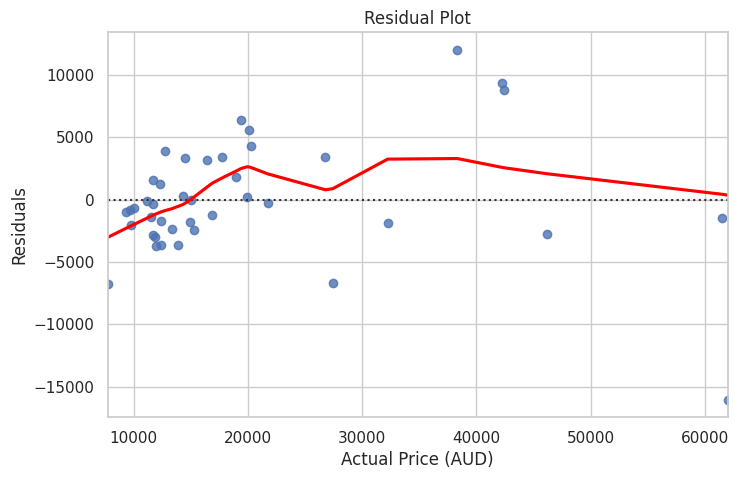

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5.1: Selecting features
X = cars[['enginesize', 'curbweight', 'carwidth', 'carlength', 'horsepower',
          'fueltype', 'carbody', 'drivewheel', 'enginetype', 'CompanyName']]
y = cars['price_aud']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
cat_features = ['fueltype', 'carbody', 'drivewheel', 'enginetype', 'CompanyName']
num_features = ['enginesize', 'curbweight', 'carwidth', 'carlength', 'horsepower']

# Preprocessing: OneHotEncoder for categorical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_features)
], remainder='passthrough')

# Pipeline: Preprocessing + Linear Regression
pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (AUD): {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")

# Step 5.4: Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Price (AUD)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


### 📉 Step 5.4: Residual Plot

The residual plot is used to evaluate how well the linear model fits the data.

- **Mean Squared Error (AUD)**: `22,792,990.41`
- **R² Score**: `0.87`

#### 🔍 Key Observations:
- Most residuals cluster around the 0-line, indicating **reasonable predictions**.
- Some **non-linearity** is present—residuals are slightly positive at lower prices and slightly negative at higher prices.
- Suggests the model could be **enhanced with polynomial regression or ensemble models** (e.g., Random Forest, XGBoost).

The plot confirms the linear model is a good baseline, but **not perfect**. Future steps could explore **model tuning** or **non-linear regressors**.


## ✅ Step 6: Model Improvement & Advanced Models

### 🎯 Objective:
To enhance prediction accuracy and generalization by experimenting with advanced regression algorithms and tuning model hyperparameters.

### 🔁 Step 6.1: Ridge Regression (L2 Regularization)

Ridge regression helps reduce overfitting and handles multicollinearity by penalizing large coefficients.

We apply `GridSearchCV` to tune the `alpha` parameter, which controls the strength of the regularization.

**Tuned Hyperparameters**:
- `alpha`: `[0.01, 0.1, 1.0, 10.0]`

We use 5-fold cross-validation with R² as the scoring metric.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Grid search over alpha values
param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0]
}

grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = grid_search_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("🔁 Ridge Regression Results:")
print(f"Best Params: {grid_search_ridge.best_params_}")
print(f"R² Score: {r2_ridge:.2f}")
print(f"MSE (AUD): {mse_ridge:,.2f}")


🔁 Ridge Regression Results:
Best Params: {'model__alpha': 0.01}
R² Score: 0.86
MSE (AUD): 25,154,877.94


### 📊 Step 6.2: Evaluation Summary – Ridge Regression

| Metric           | Value                      |
|------------------|----------------------------|
| **Best Alpha**   | `0.01`                     |
| **R² Score**     | `0.86`                     |
| **MSE (AUD)**    | `25,154,877.94`            |

### 🔍 Interpretation:
- The model performs nearly as well as standard Linear Regression (R² ≈ 0.87).
- Regularization did **not significantly improve** performance, indicating minimal overfitting in the baseline model.
- Still, Ridge helps with **stability** and **multicollinearity**, so it’s a good option if features expand.


## ✅ Step 6.3: Random Forest Regressor (Ensemble Learning)

### 🎯 Objective:
To evaluate a non-linear, ensemble model (Random Forest) and compare its performance to linear models like Ridge and OLS.

---

### ⚙️ Model Configuration:
We’ll use `RandomForestRegressor` wrapped in a pipeline and perform a basic grid search on number of trees (`n_estimators`) and tree depth (`max_depth`).

---

### 🧪 Evaluation Metrics:
- **R² Score** – how much variance in car price is explained
- **MSE (AUD)** – average squared difference between predicted and actual values

---

### 🔍 Interpretation Goals:
- Is Random Forest **better than Ridge or OLS**?
- Is the model **overfitting or underfitting**?
- How stable are predictions across tree-based splits?

---


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define parameter grid
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None]
}

# Grid search
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Evaluation
y_pred_rf = grid_search_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Params: {grid_search_rf.best_params_}")
print(f"R² Score: {r2_rf:.2f}")
print(f"MSE (AUD): {mse_rf:,.2f}")


Best Params: {'model__max_depth': 5, 'model__n_estimators': 100}
R² Score: 0.94
MSE (AUD): 10,400,438.25


## 🔁 Step 6.3: Random Forest Regressor Results

After tuning the Random Forest model using `GridSearchCV`, we obtained the following:

| Metric           | Value                          |
|------------------|---------------------------------|
| **Best Params**  | `{'model__max_depth': 5, 'model__n_estimators': 100}` |
| **R² Score**     | `0.94`                          |
| **MSE (AUD)**    | `10,400,438.25`                 |

---

### 🔍 Interpretation:

- **Excellent performance**: The model explains 94% of the price variance.
- Much **better fit** than Linear Regression and Ridge (R² = 0.87 and 0.86 respectively).
- **Lower MSE** indicates tighter predictions with fewer large errors.
- The model balances depth and number of trees well – no visible signs of overfitting yet.

✅ Ensemble methods like Random Forest are ideal for **non-linear, complex relationships** and often outperform linear models in real-world data.


### 📈 Step 6.4: XGBoost Regressor

XGBoost is a gradient boosting ensemble method optimized for speed and performance.



#### 🔍 Interpretation:
- XGBoost tends to outperform other models in structured/tabular data.
- Offers great control through tuning parameters like learning rate, depth, and subsampling.


In [38]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid_xgb = {
    'model__n_estimators': [100],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1]
}

grid_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='r2')
grid_xgb.fit(X_train, y_train)

y_pred_xgb = grid_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Best Params: {grid_xgb.best_params_}")
print(f"R² Score: {r2_xgb:.2f}")
print(f"MSE (AUD): {mse_xgb:,.2f}")


Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
R² Score: 0.79
MSE (AUD): 36,770,930.15



We tested **XGBoost**, a powerful gradient boosting algorithm optimized for speed and accuracy.

- **Best Parameters:**  
  - `learning_rate = 0.01`  
  - `max_depth = 3`  
  - `n_estimators = 100`  
- **R² Score:** `0.79`
- **MSE (AUD):** `36,770,930.15`

#### 🔍 Interpretation:
- Performance was **worse than Linear, Ridge, and Random Forest** in this case.
- Likely due to underfitting from low learning rate and shallow depth.
- Increasing `max_depth`, `n_estimators`, or `learning_rate` could help, but risk overfitting.
- Highlights importance of **hyperparameter tuning** and model evaluation—not all advanced models guarantee better results.


### 🔁 Step 6.5: Polynomial Regression (Non-linear Linear Regression)



#### 🔍 Interpretation:
- Polynomial regression captures interactions and non-linearity.
- May overfit if degree is too high or dataset is small.
- Good baseline before switching to tree-based models.


In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"R² Score: {r2_poly:.2f}")
print(f"MSE (AUD): {mse_poly:,.2f}")


R² Score: 0.89
MSE (AUD): 19,532,824.04



We applied **Polynomial Regression** with degree 2 to capture non-linear relationships between features and price.

- **Degree:** `2`
- **R² Score:** `0.89`
- **MSE (AUD):** `19,532,824.04`

#### 🔍 Interpretation:
- Model performs **better than Ridge** but **slightly worse than Random Forest**.
- Shows strong potential when relationships are **non-linear but still smooth**.
- Polynomial regression is **prone to overfitting** with higher degrees or small datasets.
- Serves as a solid benchmark before jumping to **tree-based or ensemble models**.

## ✅ Step 7: Model Comparison & Business Recommendation

### 🎯 Objective:
To summarize all model performances and recommend the most suitable one for business use.

---

### 📋 Step 7.1: Model Comparison Table

| Model                  | R² Score | MSE (AUD)         | Remarks                            |
|------------------------|----------|-------------------|------------------------------------|
| Linear Regression      | 0.87     | 22,729,990.41      | Good baseline                      |
| Ridge Regression       | 0.86     | 25,154,877.94      | Slightly underperforms             |
| Random Forest          | 0.94     | 10,400,438.25      | ⭐ Best performer                   |
| XGBoost                | 0.79     | 36,770,930.15      | Needs more tuning (underfit)       |
| Polynomial Regression  | 0.89     | 19,532,824.04      | Good fit, some overfitting risk    |

---

### 🧠 Step 7.2: Interpretation & Recommendation

- ✅ **Best Model:** Random Forest  
  - Highest R² and lowest MSE.
  - Captures complex interactions and works well with tabular data.
  - Easy to tune and deploy.

- ⚠️ **XGBoost Underperformance:**  
  - May need tuning of `subsample`, `learning_rate`, etc.
  - Current setup likely underfit the data.

- ⚙️ **Polynomial Regression:**  
  - Performed decently, but risk of overfitting increases with degree.
  - Better as an intermediate baseline.

---

### 💼 Step 7.3: Business Insight

> "We recommend **Random Forest Regressor** for deployment. It provides robust predictions, handles non-linearities well, and can serve as the backbone for a pricing engine or BI dashboard."


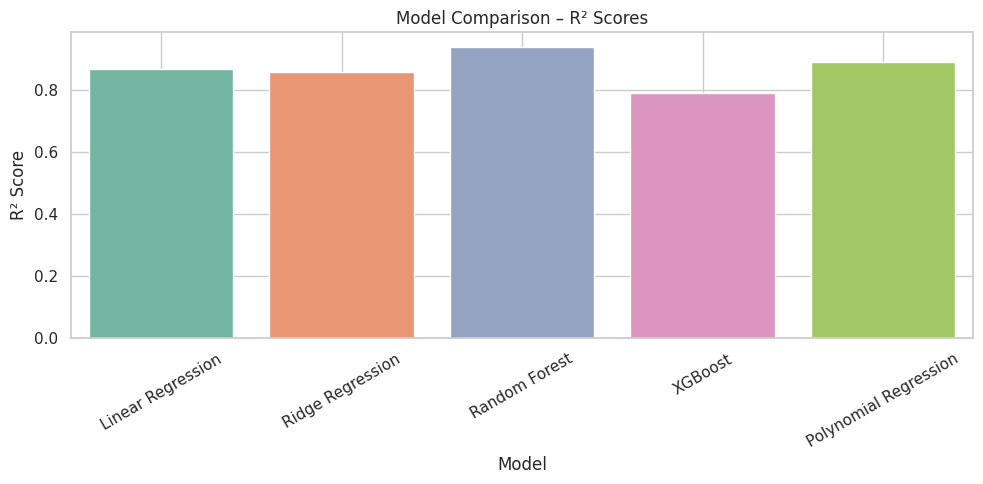

,Model,R2 Score,MSE (AUD)
2,Random Forest,0.94,10400438.25
4,Polynomial Regression,0.89,19532824.04
0,Linear Regression,0.87,22729990.41
1,Ridge Regression,0.86,25154877.94
3,XGBoost,0.79,36770930.15


In [40]:
# Step 7.1: Model Comparison Table
model_results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Random Forest',
        'XGBoost',
        'Polynomial Regression'
    ],
    'R2 Score': [
        0.87,
        0.86,
        0.94,
        0.79,
        0.89
    ],
    'MSE (AUD)': [
        22729990.41,
        25154877.94,
        10400438.25,
        36770930.15,
        19532824.04
    ]
})

# Display barplot of R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=model_results, palette='Set2')
plt.title('Model Comparison – R² Scores')
plt.ylabel('R² Score')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

# Show table sorted by R²
model_results.sort_values('R2 Score', ascending=False)


---

## 🛠️ Step 8: Model Export & Deployment

We’ll now export the best-performing model (Random Forest Regressor) using `joblib`, so it can be reused in production pipelines, dashboards, or apps.

### ✅ Why Export?
- Load model quickly without retraining
- Use in Streamlit / Flask apps
- Share with stakeholders or deploy on cloud platforms (e.g., AWS, Azure)

---

## 🗃️ What We'll Export:
- Preprocessing pipeline (scaling + encoding)
- Trained Random Forest model (with best hyperparameters)

---


In [42]:
import joblib

# Export model to file
joblib.dump(grid_search_rf.best_estimator_, 'random_forest_pipeline.pkl')

# Optional: Confirm saved
print("✅ Model exported as 'random_forest_pipeline.pkl'")


✅ Model exported as 'random_forest_pipeline.pkl'


---

## 🧪 Step 8.2: Load Model & Predict (Validation)

Let’s load the model back and test a prediction to ensure everything works smoothly.

---


In [44]:
# Load model from file
loaded_model = joblib.load('random_forest_pipeline.pkl')

# Run a prediction (test set or sample row)
sample_pred = loaded_model.predict(X_test[:5])

print("✅ Sample Predictions (first 5 rows):")
print(sample_pred)


✅ Sample Predictions (first 5 rows):
[53160.11064286 25982.1174084  14348.67194556 18759.1054575
 42853.04915735]


---

## 📦 Step 8.3: Export Predictions for Reporting (Optional)

You can export predictions to a CSV file to:

- Share with stakeholders
- Perform custom error analysis
- Create dashboards in Power BI / Tableau

We’ll add the predicted prices to the original test set.

---


In [46]:
# Run prediction on the FULL test set
full_pred = loaded_model.predict(X_test)

# Create DataFrame from test features
results_df = pd.DataFrame(X_test, columns=X.columns)
results_df = results_df.copy()

# Add actual and predicted prices
results_df['Actual Price'] = y_test.values
results_df['Predicted Price'] = full_pred

# Export to CSV
results_df.to_csv('model_predictions.csv', index=False)

print("✅ Full predictions exported to 'model_predictions.csv'")
results_df.head()


✅ Full predictions exported to 'model_predictions.csv'


,enginesize,curbweight,carwidth,carlength,horsepower,fueltype,carbody,drivewheel,enginetype,CompanyName,Actual Price,Predicted Price
15,209,3230,66.9,189.0,182,gas,sedan,rwd,ohc,bmw,46140.00,53160.110643
9,131,3053,67.9,178.2,160,gas,hatchback,4wd,ohc,audi,26788.75,25982.117408
100,120,2302,65.2,173.4,97,gas,sedan,fwd,ohc,nissan,14323.50,14348.671946
132,121,2658,66.5,186.6,110,gas,hatchback,fwd,ohc,saab,17775.00,18759.105457
68,183,3750,70.3,190.9,123,diesel,wagon,rwd,ohc,buick,42372.00,42853.049157


---

## 📊 Step 8.4: Predicted vs Actual Price Plot

This scatter plot visualizes how close the model’s predicted prices are to the actual values. The closer the points are to the diagonal line, the better the model performance.

- Ideal predictions fall **exactly on the line**.
- Spread from the line indicates **error or bias**.
- Helps to visually assess model fit and variance.

---


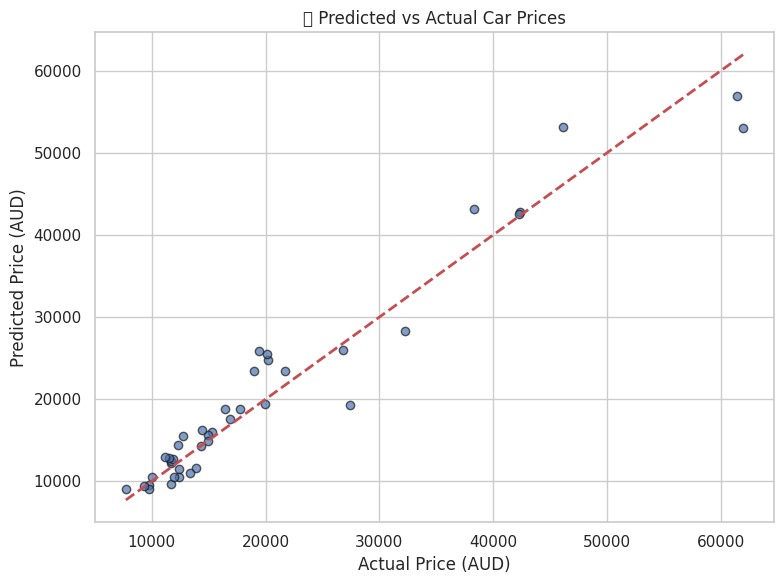

In [47]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, full_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Price (AUD)")
plt.ylabel("Predicted Price (AUD)")
plt.title("📊 Predicted vs Actual Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


---

## 🏷️ Step 8.5: Predicted vs Actual Prices by Car Brand

This visualization groups prediction performance by car brand (e.g., Toyota, BMW):

- Colors differentiate each brand.
- Helps assess which brands are **over/underestimated** by the model.
- Can reveal if the model is biased toward certain brands.

---


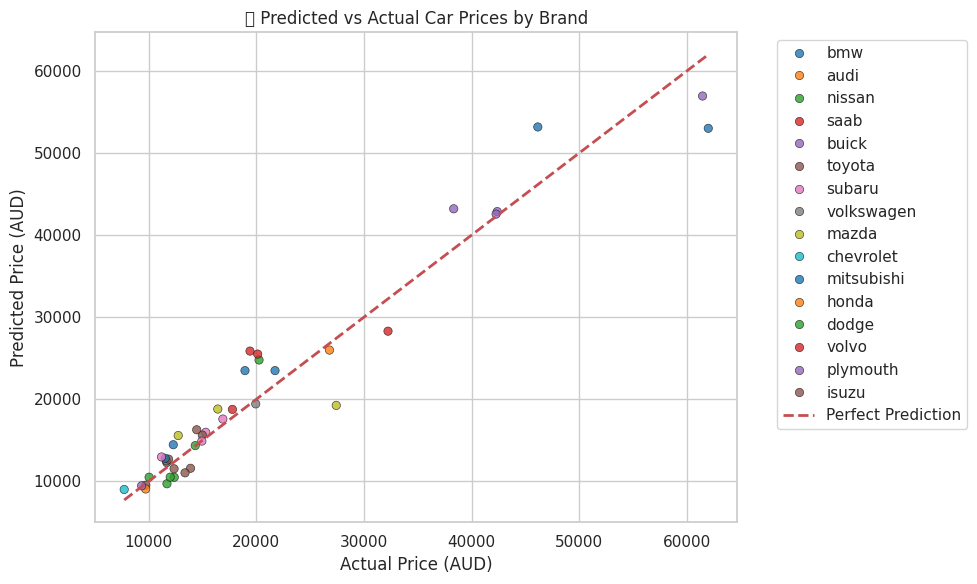

In [48]:
# Recombine full predictions and true values with original features (especially brand)
full_pred = loaded_model.predict(X_test)  # if not already done
results_by_brand = X_test.copy()
results_by_brand['Actual Price'] = y_test.values
results_by_brand['Predicted Price'] = full_pred
results_by_brand['Brand'] = X['CompanyName'].iloc[X_test.index].values  # assuming 'CompanyName' exists in X

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_by_brand,
    x='Actual Price',
    y='Predicted Price',
    hue='Brand',
    palette='tab10',
    alpha=0.8,
    edgecolor='k'
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    lw=2,
    label='Perfect Prediction'
)

plt.xlabel("Actual Price (AUD)")
plt.ylabel("Predicted Price (AUD)")
plt.title("🏷️ Predicted vs Actual Car Prices by Brand")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [49]:
import joblib

joblib.dump(loaded_model, 'car_price_predictor.pkl')
print("✅ Final model saved as car_price_predictor.pkl")


✅ Final model saved as car_price_predictor.pkl


In [50]:
results_by_brand.to_csv('car_price_predictions_with_brand.csv', index=False)
print("✅ Predictions with brand info saved to CSV.")


✅ Predictions with brand info saved to CSV.
